In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("D:/train.csv")
df.shape

(404290, 6)

In [4]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
295090,295090,171557,417082,What percent of smokers develop cancer vs non ...,Is coughing in the morning for a smoker linked...,0
92657,92657,66459,155081,What heppen if I use petrol in diesel engine?,Why can't we use petrol in diesel?,1
254117,254117,2654,368782,How do I get mods for GTA v on my Xbox one?,Do we need to pay anything to play GTA v onlin...,0
334617,334617,461805,255914,What is the weight of a modern football helmet?,Did helmets ever help in a war?,0
125047,125047,201812,201813,What is SPF?,What SPF should I use?,0
359832,359832,99035,17824,What is your most viewed Quora question?,What is the all-time most viewed question on Q...,1
45937,45937,82236,82237,What is an epoch in deep learning?,What is epochs in machine learning?,0
71113,71113,122429,122430,When was the boston marathon?,When is the boston marathon 2016?,0
178129,178129,273653,273654,Why do most Indian politicians use an ambassad...,What should be done to revive Ambassador car p...,0
154050,154050,161588,241673,"I feel the need to talk to someone, but am not...",I have liked this girl for a long time. I feel...,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
# Finding Nullvalues
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
# Duplicate rows
df.duplicated().sum()

0

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


<Axes: >

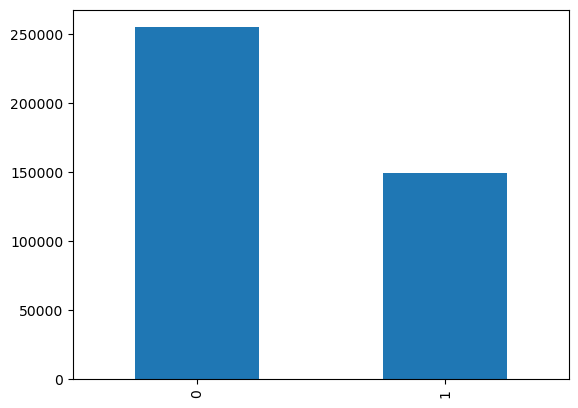

In [8]:
# Distribution of Duplicate and non-duplicate questions

print(df["is_duplicate"].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [9]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print("Number of Unique question:",np.unique(qid).shape[0])
x = qid.value_counts()>1
print("Number of question getting repeated:",x[x].shape[0])

Number of Unique question: 537933
Number of question getting repeated: 111780


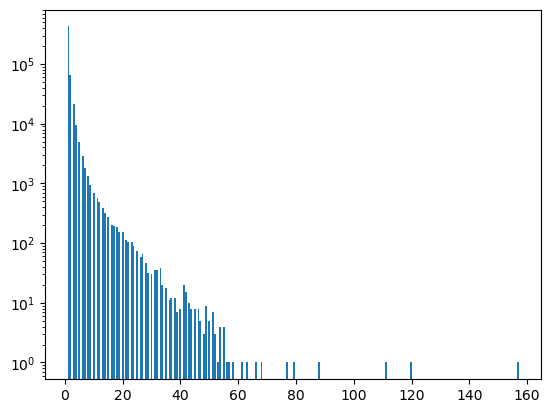

In [10]:
# Repeared question histogram

plt.hist(qid.value_counts().values,bins=250)
plt.yscale('log')
plt.show()

In [11]:
new_df = df.sample(30000)

In [12]:
new_df.shape

(30000, 6)

In [13]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [15]:
new_df.duplicated().sum()

0

In [19]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
148628,How does one avoid sleep?,How do i avoid sleep?
255080,What are the best newsletters about photography?,Which are the best newsletters to subscribe to?
206396,What is the start salary of a junior embedded ...,What is the salary range for a fresh graduate ...
307140,Who is the highest paid athlete?,Who are the highest paid athletes of all time?
314659,When will Spotify arrive in India?,Daniel Ek: What are the hardships for Spotify ...


In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
# Merge texts

questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [23]:
temp_df1 = pd.DataFrame(q1_arr, index = ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index = ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis = 1)
temp_df.shape

(30000, 6000)

In [25]:
temp_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
148628,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
255080,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
314659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [27]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
148628,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
255080,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
307140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
314659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108972,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
240574,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7423333333333333

In [41]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7246666666666667